### Importing libraries and dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r"F:\Paython\python_class_practice\Pima.csv")
df.head()

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [33]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
npreg    332 non-null int64
glu      332 non-null int64
bp       332 non-null int64
skin     332 non-null int64
bmi      332 non-null float64
ped      332 non-null float64
age      332 non-null int64
type     332 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 20.9+ KB


### EDA and Data Pre-processing

In [35]:
df.describe()

,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,3.484940,119.259036,71.653614,29.162651,33.239759,0.528389,31.316265
std,3.283634,30.501138,12.799307,9.748068,7.282901,0.363278,10.636225
min,0.000000,65.000000,24.000000,7.000000,19.400000,0.085000,21.000000
25%,1.000000,96.000000,64.000000,22.000000,28.175000,0.266000,23.000000
50%,2.000000,112.000000,72.000000,29.000000,32.900000,0.440000,27.000000
75%,5.000000,136.250000,80.000000,36.000000,37.200000,0.679250,37.000000
max,17.000000,197.000000,110.000000,63.000000,67.100000,2.420000,81.000000


In [36]:
df.describe(include='object')

,type
count,332
unique,2
top,No
freq,223


In [12]:
#converting the type variable into 1s and 0s: 1 for Yes and 0 for No
def myfunc(st):
    st = st.lower()
    if (st == "yes"):
        return 1
    elif (st == "no"):
        return 0

In [13]:
df['type']=df['type'].apply(lambda x: myfunc(x))

In [37]:
#splitting the target and predictor variables
target = df['type']
predictor = df.drop('type',axis=1)

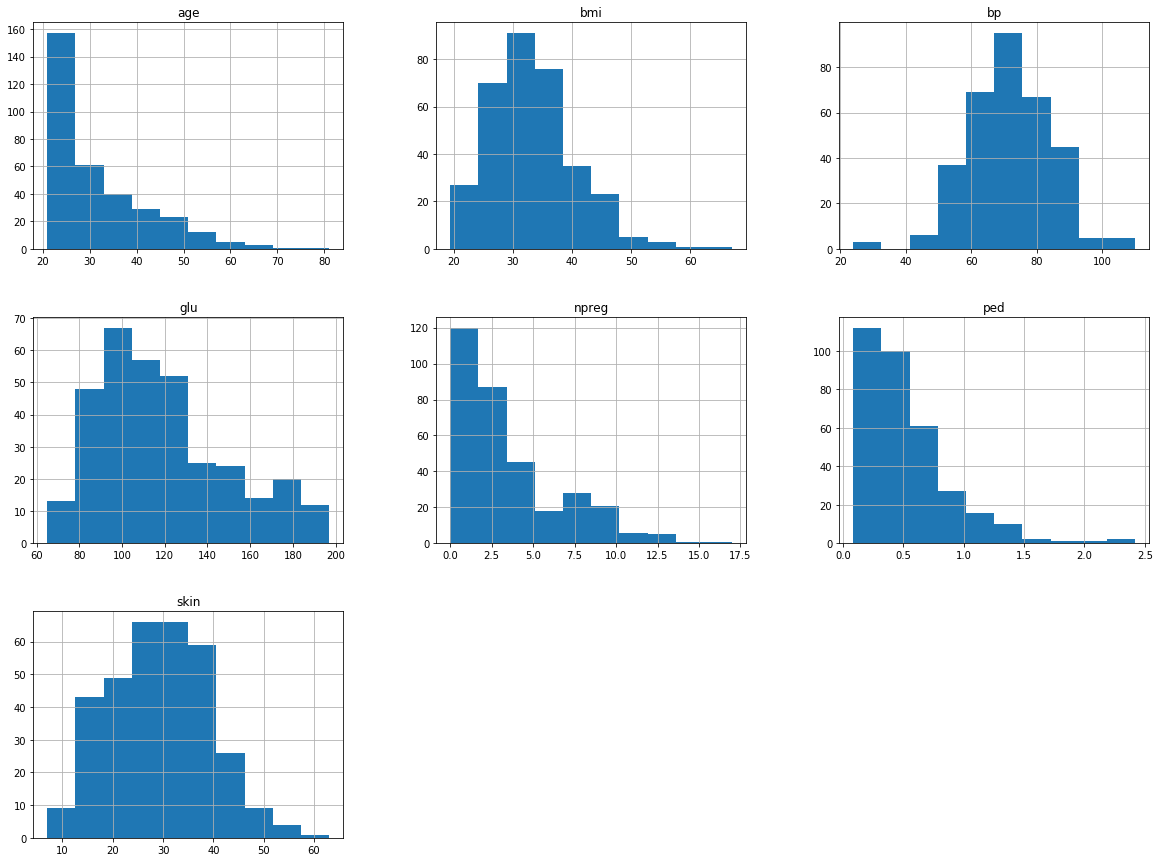

In [38]:
predictor.hist(figsize=(20,15))
plt.show()

In [39]:
predictor.dtypes

npreg      int64
glu        int64
bp         int64
skin       int64
bmi      float64
ped      float64
age        int64
dtype: object

In [17]:
#checking for skewness value
predictor.skew()

npreg    1.171401
glu      0.708954
bp      -0.085421
skin     0.236247
bmi      0.805335
ped      1.838795
age      1.393979
dtype: float64

In [18]:
#skewness treatment
predictor['npreg'] = np.log1p(predictor['npreg'])
predictor['glu'] = np.sqrt(predictor['glu'])
predictor['bmi'] = np.sqrt(predictor['bmi'])
predictor['ped'] = np.cbrt(predictor['ped'])
predictor['age'] = np.log1p(np.log1p(np.log1p(predictor['age'])))

In [19]:
predictor.skew()

npreg   -0.065403
glu      0.484120
bp      -0.085421
skin     0.236247
bmi      0.415590
ped      0.541252
age      0.682735
dtype: float64

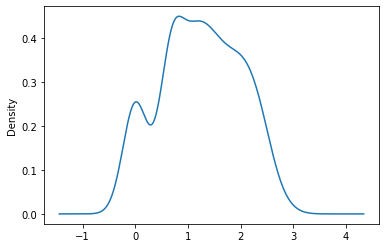

In [20]:
predictor.npreg.plot(kind='kde')

In [21]:
#normalizing the data
predictor = (predictor - predictor.mean())/predictor.std()
predictor.describe()

,npreg,glu,bp,skin,bmi,ped,age
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,4.551246e-16,-3.646681e-15,9.614130e-17,9.229565e-17,-3.429820e-15,-3.299904e-15,2.035688e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.634252e+00,-2.034631e+00,-3.723140e+00,-2.273543e+00,-2.143435e+00,-1.985940e+00,-1.218510e+00
25%,-7.151266e-01,-7.611828e-01,-5.979710e-01,-7.347765e-01,-6.847524e-01,-7.719855e-01,-8.800183e-01
50%,-1.774724e-01,-1.852104e-01,2.706284e-02,-1.668542e-02,6.012690e-03,-7.101257e-02,-3.041027e-01
75%,7.416535e-01,6.142051e-01,6.520967e-01,7.014056e-01,5.926194e-01,6.358018e-01,7.561200e-01
max,2.198433e+00,2.347938e+00,2.995974e+00,3.471185e+00,3.970681e+00,3.401826e+00,3.043665e+00


In [22]:
predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
npreg    332 non-null float64
glu      332 non-null float64
bp       332 non-null float64
skin     332 non-null float64
bmi      332 non-null float64
ped      332 non-null float64
age      332 non-null float64
dtypes: float64(7)
memory usage: 18.3 KB


### Model creation and Training

In [40]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (232, 7)
x_test  (100, 7)
y_train  (232,)
y_test  (100,)


In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [43]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [46]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []

   

In [50]:
for train_index, test_index in folds.split(predictor,target):
    x_train, x_test, y_train, y_test = predictor[train_index], predictor[test_index], \
                                       target[train_index], target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, x_test, y_train, y_test))

KeyError: "None of [Int64Index([103, 105, 110, 112, 116, 117, 118, 119, 120, 121,\n            ...\n            322, 323, 324, 325, 326, 327, 328, 329, 330, 331],\n           dtype='int64', length=220)] are in the [columns]"

In [18]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(y_train,x_train)

# fit the model
model1 = logit.fit()

# Prining Logistic Regression model results 
model1.summary()

Optimization terminated successfully.
         Current function value: 0.510479
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   type   No. Observations:                  232
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            6
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.1847
Time:                        11:02:49   Log-Likelihood:                -118.43
converged:                       True   LL-Null:                       -145.25
Covariance Type:            nonrobust   LLR p-value:                 8.709e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
npreg          0.2014      0.224      0.898      0.369      -0.238       0.641
glu            1.1259      0.200      5.633      0.000       0.734       1.518
bp            -0.0408      0.196     -0.209      0.835      -0.424       0.343
skin           0.0629      0.213      0.296      0.768      -0.354       0.480
bmi            0.4463      0.238      1.878      0.060      -0.019       0.912
ped            0.2465      0.180      1.372      0.170      -0.106       0.599
age            0.2745      0.243      1.128      0.259      -0.202       0.752
==============================================================================
"""

In [19]:
# Predict values using test data
y_pred = model1.predict(x_test)

In [20]:
# Making y_pred as DataFrame
predicted_df = pd.DataFrame(y_pred)
predicted_df.head(5)

,0
52,0.880575
56,0.497871
55,0.334530
191,0.296550
145,0.353744


In [21]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.5,1,0)
predicted_df.head(5)

,0,Predicted_Class
52,0.880575,1
56,0.497871,0
55,0.334530,0
191,0.296550,0
145,0.353744,0


### Model Accuracy

In [22]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df['Predicted_Class']))

0.78


In [23]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df['Predicted_Class'])
confusion_matrix

array([[48, 17],
       [ 5, 30]], dtype=int64)

### Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81        65
           1       0.64      0.86      0.73        35

    accuracy                           0.78       100
   macro avg       0.77      0.80      0.77       100
weighted avg       0.81      0.78      0.78       100



### ROC and AUC

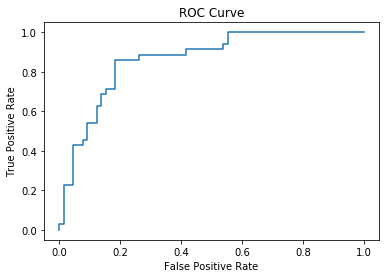

In [25]:
y_pred_prob = model1.predict(x_test)

from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [26]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df['Predicted_Class'])

0.7978021978021979

In [27]:
print(df.groupby('type').size())

type
0    223
1    109
dtype: int64


### Oversampling

In [31]:
from imblearn.over_sampling import SMOTE

In [33]:
ovsm = SMOTE(random_state=2)

In [35]:
x1_train,y1_train = ovsm.fit_sample(x_train,y_train)

In [36]:
logit1 = sm.Logit(y1_train,x1_train)

# fit the model
model2 = logit1.fit()

# Prining Logistic Regression model results 
model2.summary()

Optimization terminated successfully.
         Current function value: 0.435537
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  316
Model:                          Logit   Df Residuals:                      309
Method:                           MLE   Df Model:                            6
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.3717
Time:                        11:39:56   Log-Likelihood:                -137.63
converged:                       True   LL-Null:                       -219.03
Covariance Type:            nonrobust   LLR p-value:                 1.504e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3133      0.216      1.451      0.147      -0.110       0.736
x2             1.4162      0.191      7.399      0.000       1.041       1.791
x3            -0.1006      0.191     -0.527      0.598      -0.475       0.274
x4             0.1635      0.208      0.787      0.431      -0.244       0.571
x5             0.4704      0.232      2.031      0.042       0.016       0.924
x6             0.2496      0.173      1.440      0.150      -0.090       0.589
x7             0.3018      0.242      1.249      0.212      -0.172       0.776
==============================================================================
"""

In [37]:
# Predict values using test data
y_pred1 = model2.predict(x_test)

In [38]:
# Making y_pred as DataFrame
predicted_df1 = pd.DataFrame(y_pred1)
predicted_df1.head(5)

,0
52,0.933392
56,0.495742
55,0.302220
191,0.226327
145,0.359690


In [39]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df1['Predicted_Class'] = np.where(predicted_df1[0]>= 0.5,1,0)
predicted_df1.head(5)

,0,Predicted_Class
52,0.933392,1
56,0.495742,0
55,0.302220,0
191,0.226327,0
145,0.359690,0


In [40]:
print(accuracy_score(y_test,predicted_df1['Predicted_Class']))

0.77


In [41]:
print(classification_report(y_test, predicted_df1['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        65
           1       0.62      0.86      0.72        35

    accuracy                           0.77       100
   macro avg       0.76      0.79      0.76       100
weighted avg       0.81      0.77      0.78       100



In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Predict values using test data
y_pred1 = lr.predict(x_test)

In [29]:
lr.score(x_test,y_test)

0.75

In [30]:
# Making y_pred as DataFrame
predicted_df1 = pd.DataFrame(y_pred1)
predicted_df1.head(5)

,0
0,1
1,0
2,0
3,0
4,0
